In [152]:
import pandas as pd

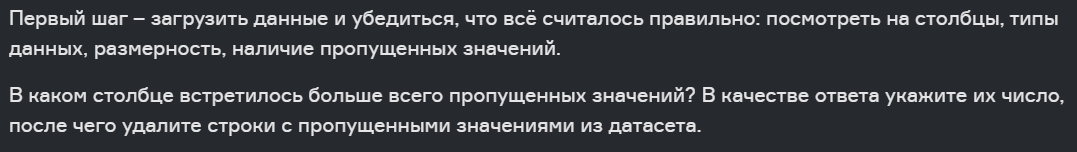

In [153]:
data = pd.read_csv('games.csv')

In [154]:
data.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [155]:
data = data.dropna()
data['Year'] = data.Year.apply(lambda x: int(x))
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


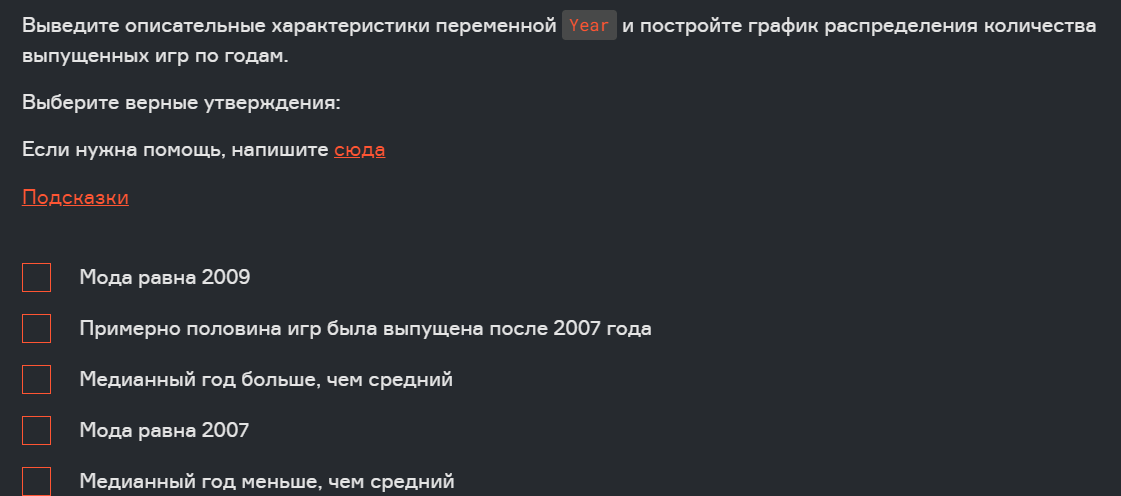

In [156]:
data.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [157]:
import scipy
scipy.stats.mode(data.Year)

ModeResult(mode=array([2009], dtype=int64), count=array([1431]))

In [158]:
res = data.Year.value_counts().reset_index().rename(columns={'Year':'cnt', 'index':'year'})
res.head()

,year,cnt
0,2009,1431
1,2008,1428
2,2010,1257
3,2007,1201
4,2011,1136


In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='year', ylabel='cnt'>

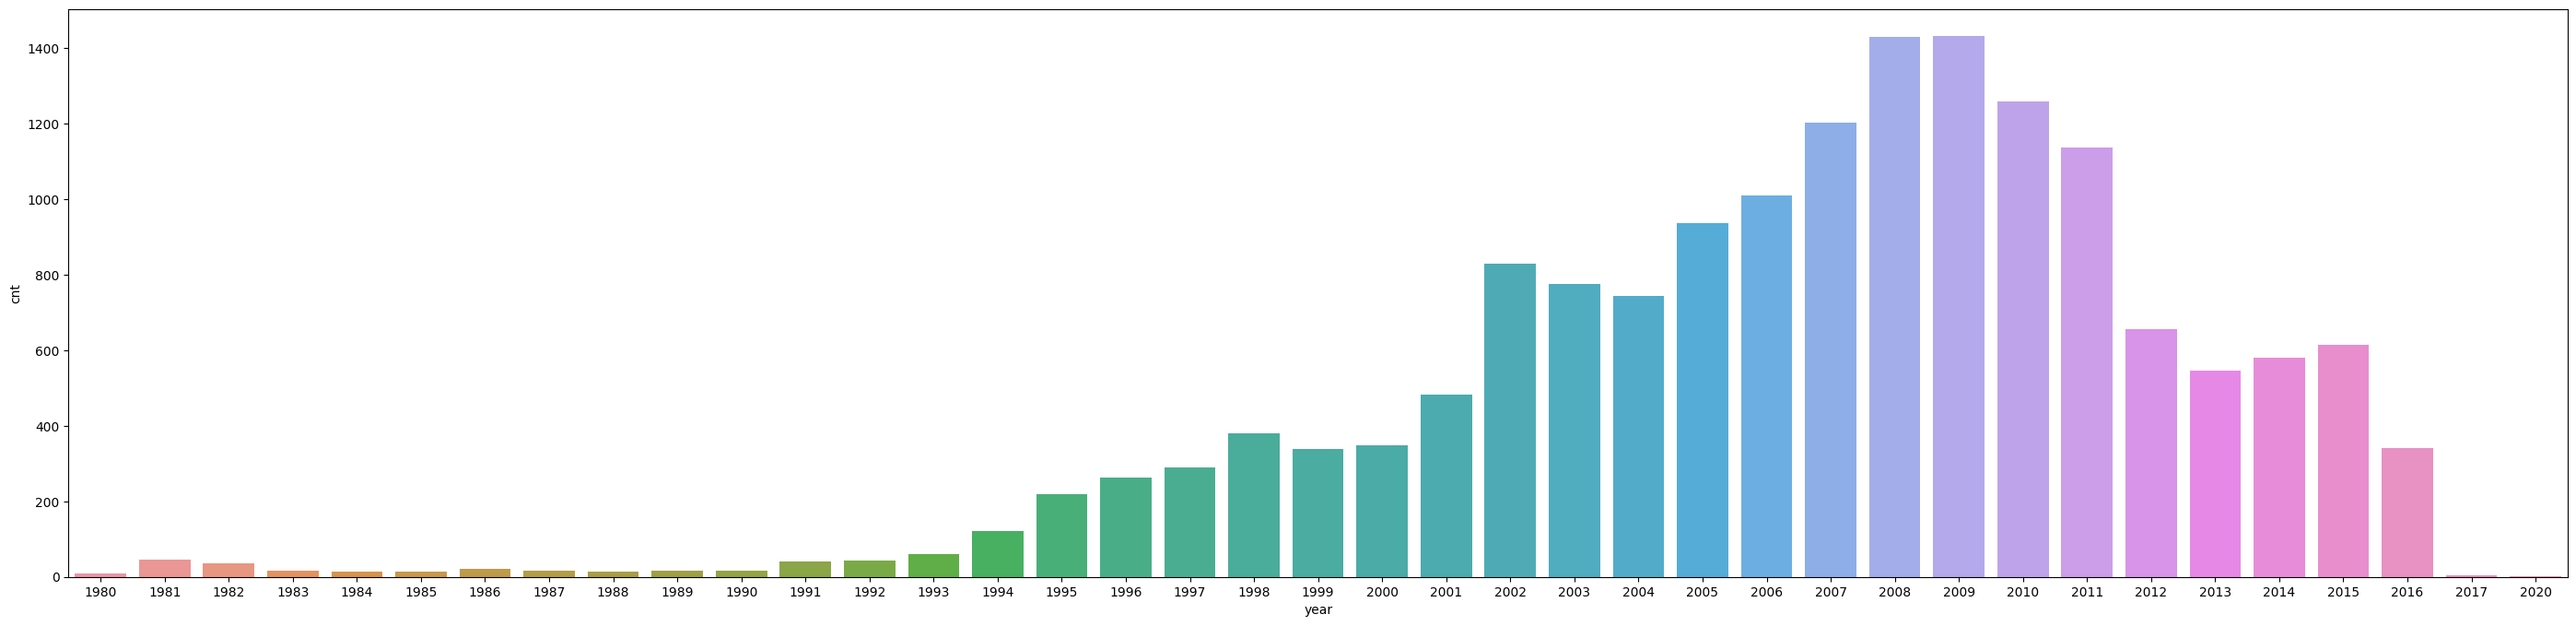

In [160]:
plt.figure(figsize=(35, 8))
sns.barplot(data=res, x='year', y='cnt')

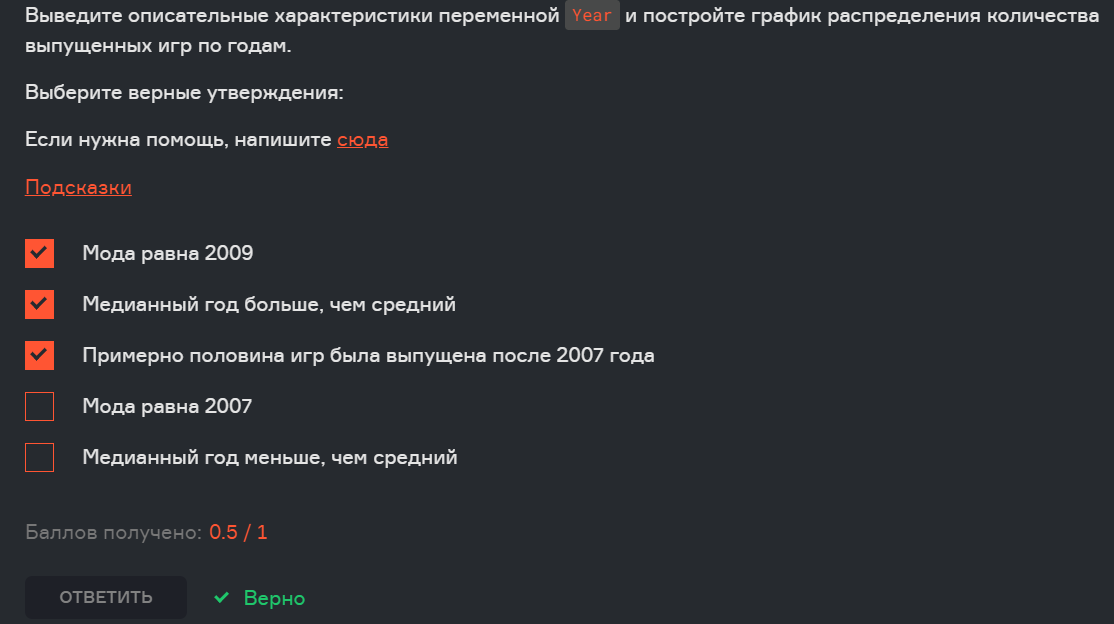

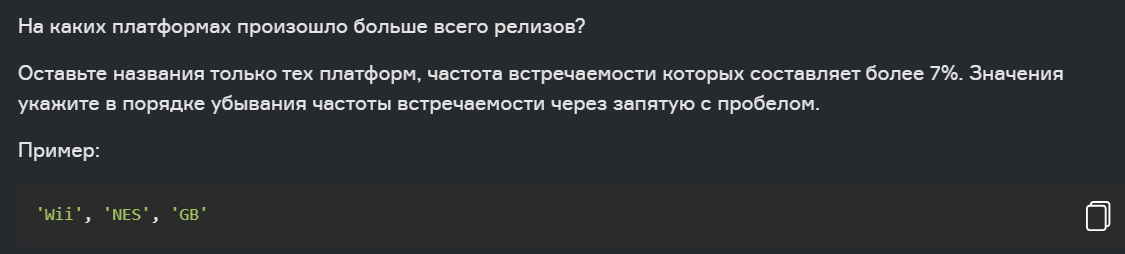

In [161]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [162]:
res = data.Platform.value_counts(normalize=True)
res.head()

DS      0.130808
PS2     0.130563
PS3     0.080044
Wii     0.079185
X360    0.075747
Name: Platform, dtype: float64

In [163]:
res[res>0.07]

DS      0.130808
PS2     0.130563
PS3     0.080044
Wii     0.079185
X360    0.075747
PSP     0.073476
PS      0.072985
Name: Platform, dtype: float64

In [164]:
res[res>0.07].index.to_list()

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

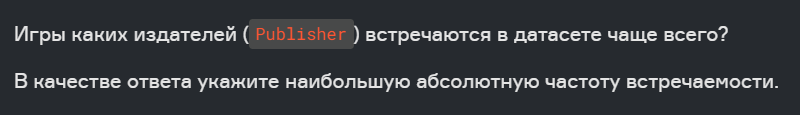

In [165]:
data.Publisher.value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Interchannel-Holon                 1
Gaga                               1
Game Arts                          1
FuRyu Corporation                  1
Number None                        1
Name: Publisher, Length: 576, dtype: int64

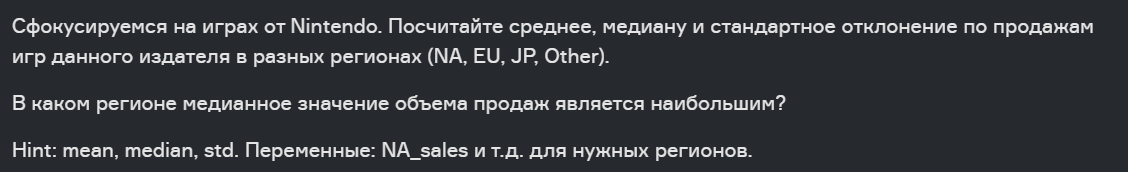

In [166]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
res = data.query('Publisher == "Nintendo"')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
res.describe().loc[['mean', '50%']]

In [ ]:
res.std(ddof=1)

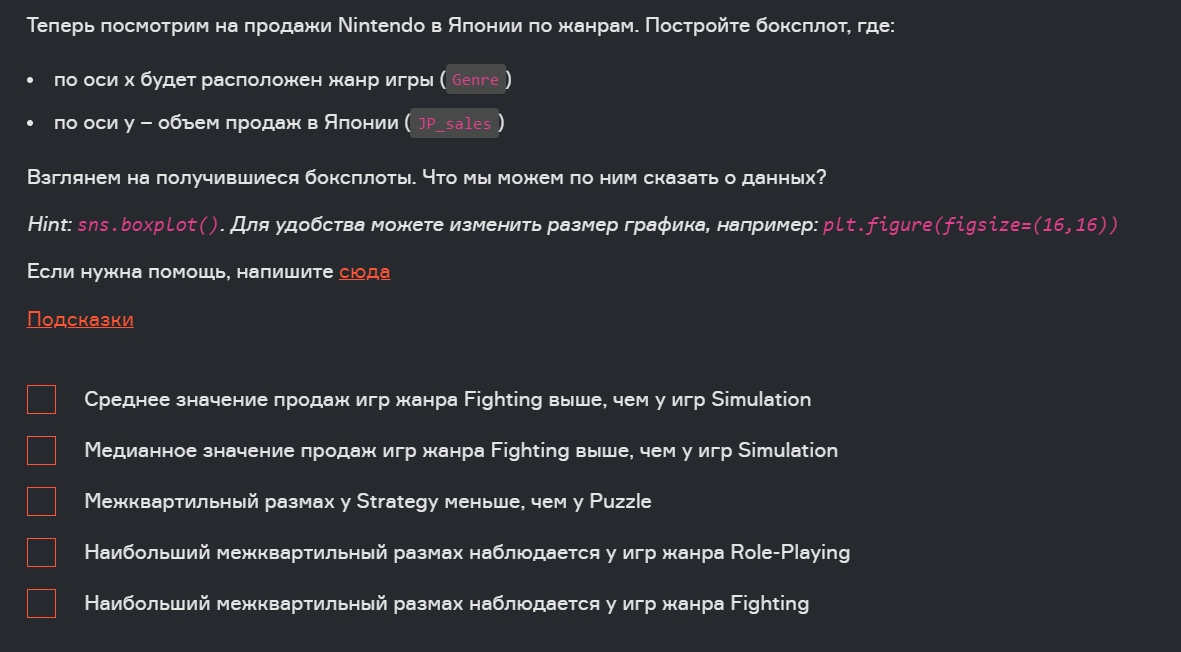

In [ ]:
res = data.query('Publisher == "Nintendo"')
res

In [ ]:
plt.figure(figsize=(16,16))
sns.boxplot(data=res, x='Genre', y='JP_Sales')

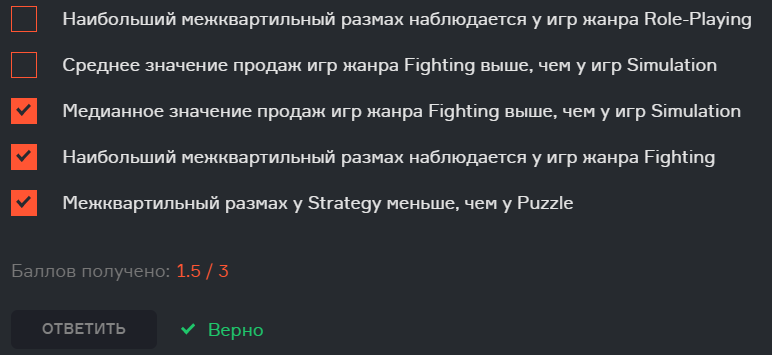

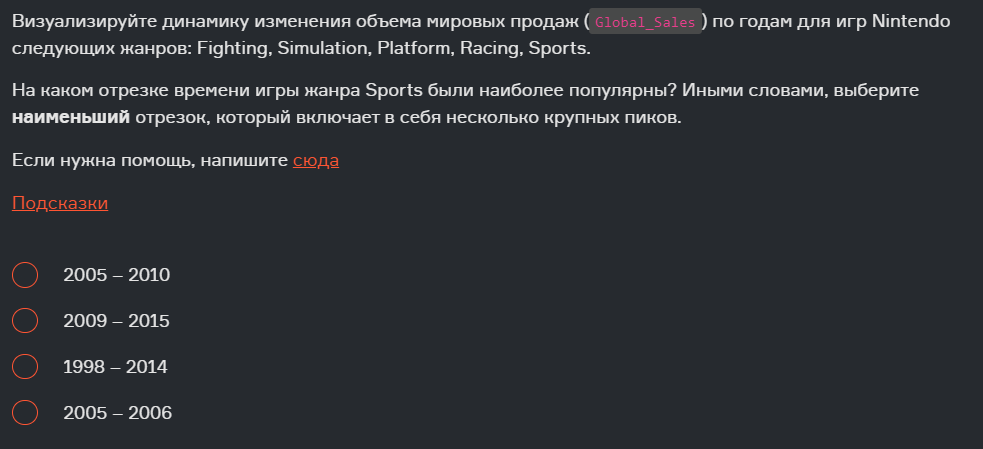

In [ ]:
res.head()

In [ ]:
genres = ['Fighting', 'Simulation', 'Platform', 'Racing', 'Sports']
res = res\
    .query('Genre in @genres')\
    .groupby(['Year', 'Genre'], as_index=False)\
    .agg({'Name':'count'})\
    .rename(columns={'Name':'cnt'})\
    .sort_values(['Year', 'Genre'])
res

In [ ]:
plt.figure(figsize=(30, 15))
sns.barplot(data=res, x='Year', y='cnt', hue='Genre')